<a href="https://colab.research.google.com/github/Imam-Syaukani97/KNN-Project-Bootcamp/blob/main/KNNTechadBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input Data

Data Preparation

In [ ]:
import pandas as pd
df = pd.read_excel("/content/BankNote_Authentication.xlsx")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,authentic
1,4.54590,8.16740,-2.4586,-1.46210,authentic
2,3.86600,-2.63830,1.9242,0.10645,authentic
3,3.45660,9.52280,-4.0112,-3.59440,authentic
4,0.32924,-4.45520,4.5718,-0.98880,authentic
...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,counterfeit
1358,-1.38870,-4.87730,6.4774,0.34179,counterfeit
1359,-3.75030,-13.45860,17.5932,-2.77710,counterfeit
1360,-3.56370,-8.38270,12.3930,-1.28230,counterfeit


In [ ]:
df.shape

(1362, 5)

In [ ]:
df['class'].value_counts()

authentic      757
counterfeit    605
Name: class, dtype: int64

In [ ]:
df.describe()

,variance,skewness,curtosis,entropy
count,1362.000000,1362.000000,1362.000000,1362.000000
mean,0.443521,1.916458,1.396395,-1.177602
std,2.839102,5.865625,4.312428,2.089540
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.767250,-1.701475,-1.631525,-2.389550
50%,0.505190,2.301000,0.622630,-0.580830
75%,2.823575,6.809500,3.183950,0.396752
max,6.824800,12.951600,17.927400,2.449500


In [ ]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,1
1358,-1.38870,-4.87730,6.4774,0.34179,1
1359,-3.75030,-13.45860,17.5932,-2.77710,1
1360,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
#outliers detection and removal
df['z-score1'] = abs((df.variance - df.variance.mean()) / df.variance.std())
df['z-score2'] = abs((df.skewness - df.skewness.mean()) / df.skewness.std())
df['z-score3'] = abs((df.curtosis - df.curtosis.mean()) / df.curtosis.std())
df['z-score4'] = abs((df.entropy - df.entropy.mean()) / df.entropy.std())
df


,variance,skewness,curtosis,entropy,class,z-score1,z-score2,z-score3,z-score4
0,3.62160,8.66610,-2.8073,-0.44699,0,1.119396,1.150711,0.974786,0.349652
1,4.54590,8.16740,-2.4586,-1.46210,0,1.444956,1.065691,0.893927,0.136153
2,3.86600,-2.63830,1.9242,0.10645,0,1.205479,0.776517,0.122392,0.614514
3,3.45660,9.52280,-4.0112,-3.59440,0,1.061279,1.296766,1.253956,1.156617
4,0.32924,-4.45520,4.5718,-0.98880,0,0.040252,1.086271,0.736338,0.090356
...,...,...,...,...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,1,0.013166,0.096709,0.660068,0.295813
1358,-1.38870,-4.87730,6.4774,0.34179,1,0.645352,1.158233,1.178224,0.727142
1359,-3.75030,-13.45860,17.5932,-2.77710,1,1.477164,2.621214,3.755843,0.765478
1360,-3.56370,-8.38270,12.3930,-1.28230,1,1.411439,1.755850,2.549980,0.050106


In [ ]:
df_no_outliers = df[(df["z-score1"]<3) & (df["z-score2"]<3) & (df["z-score3"]<3) & (df["z-score4"]<3)]
df_no_outliers.drop("z-score1",inplace = True, axis = 1)
df_no_outliers.drop("z-score2",inplace = True, axis = 1)
df_no_outliers.drop("z-score3",inplace = True, axis = 1)
df_no_outliers.drop("z-score4",inplace = True, axis = 1)
df_no_outliers = df_no_outliers.reset_index(drop = True)
df_no_outliers

<ipython-input-8-4485ee3eeb66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop("z-score1",inplace = True, axis = 1)
<ipython-input-8-4485ee3eeb66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop("z-score2",inplace = True, axis = 1)
<ipython-input-8-4485ee3eeb66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop("z-score3",inplace = True, axis = 1)
<ipython-input-8-4485ee3eeb6

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1323,-2.41000,3.74330,-0.40215,-1.29530,1
1324,0.40614,1.34920,-1.45010,-0.55949,1
1325,-1.38870,-4.87730,6.47740,0.34179,1
1326,-3.56370,-8.38270,12.39300,-1.28230,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_no_outliers.iloc[:,:4])

MinMaxScaler()

scaling to value features

In [ ]:
X_scaled = scaler.transform(df_no_outliers.iloc[:,:4])
X_scaled = pd.DataFrame(X_scaled, columns = ["variance","skewness","curtosis","entropy"])
df_no_outliers = pd.merge(X_scaled, df_no_outliers.iloc[:,-1:], left_index = True, right_index = True)
df_no_outliers

,variance,skewness,curtosis,entropy,class
0,0.769004,0.836671,0.132141,0.705886,0
1,0.835659,0.817665,0.150729,0.602811,0
2,0.786629,0.405839,0.384369,0.762083,0
3,0.757105,0.869322,0.067963,0.386294,0
4,0.531578,0.336593,0.525508,0.650870,0
...,...,...,...,...,...
1323,0.334040,0.649054,0.260355,0.619748,1
1324,0.537124,0.557810,0.204491,0.694463,1
1325,0.407690,0.320506,0.627092,0.785980,1
1326,0.250842,0.186909,0.942443,0.621068,1


In [ ]:
x_clean = df_no_outliers.iloc[:,:4]
y_clean = df_no_outliers.iloc[:,-1]

In [ ]:
y_clean.value_counts()

0    747
1    581
Name: class, dtype: int64

<Axes: ylabel='class'>

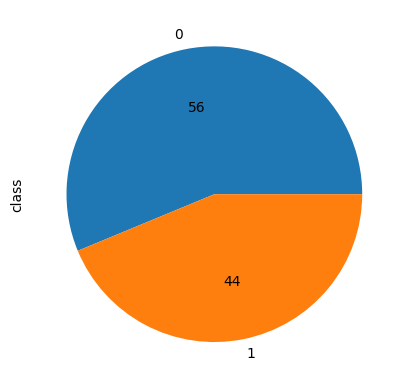

In [ ]:
y_clean.value_counts().plot.pie(autopct = '%2.f')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1)
X_res_under, y_res_under = rus.fit_resample(x_clean, y_clean)



<Axes: ylabel='class'>

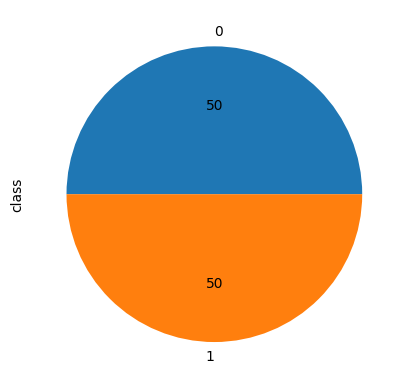

In [ ]:
ax = y_res_under.value_counts().plot.pie(autopct = '%2.f')
ax

In [ ]:
y_res_under.value_counts()

0    581
1    581
Name: class, dtype: int64

In [ ]:
df_clean = pd.merge(X_res_under, y_res_under, left_index = True, right_index = True )
df_clean

,variance,skewness,curtosis,entropy,class
0,0.468918,0.785647,0.306626,0.603603,0
1,0.417144,0.566957,0.655367,0.794384,0
2,0.888281,0.511673,0.288264,0.867387,0
3,0.808631,0.838802,0.120674,0.690655,0
4,0.837447,0.781154,0.106974,0.599531,0
...,...,...,...,...,...
1157,0.334040,0.649054,0.260355,0.619748,1
1158,0.537124,0.557810,0.204491,0.694463,1
1159,0.407690,0.320506,0.627092,0.785980,1
1160,0.250842,0.186909,0.942443,0.621068,1


<Axes: >

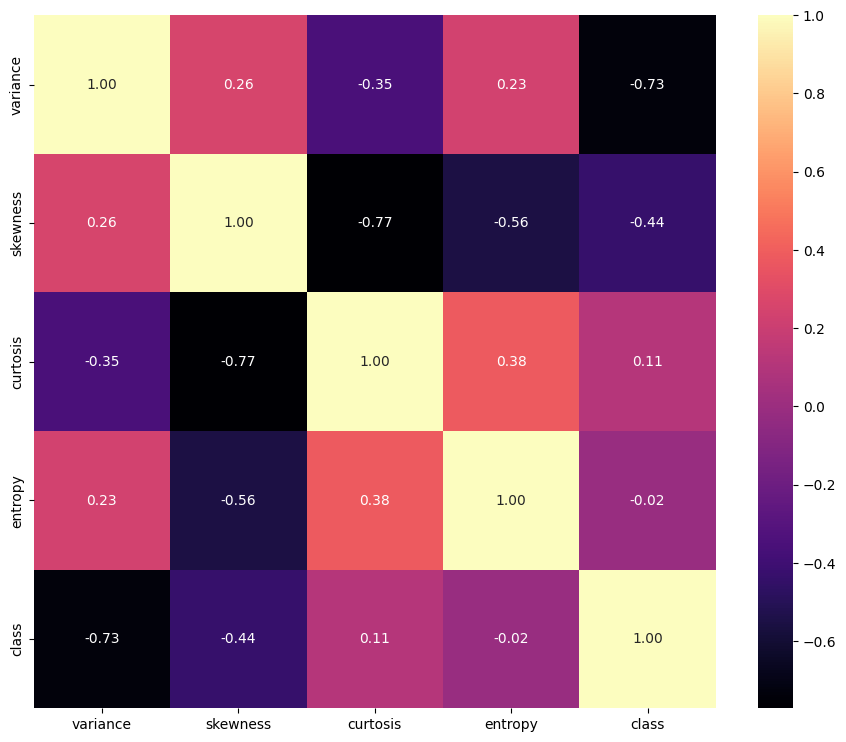

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation map (pearson correlation)

plt.figure(figsize=(11,9))
cor = df_clean.corr('pearson')
sns.heatmap(cor, annot =True, cmap ='magma', fmt ='.2f' )

In [ ]:
cor_target = abs(cor['class'])
relevant_features = cor_target[cor_target >=.4]
relevant_features

variance    0.731649
skewness    0.436917
class       1.000000
Name: class, dtype: float64

In [ ]:
df_clean1 = df_clean[["variance", "skewness", "class"]]
df_clean1

,variance,skewness,class
0,0.468918,0.785647,0
1,0.417144,0.566957,0
2,0.888281,0.511673,0
3,0.808631,0.838802,0
4,0.837447,0.781154,0
...,...,...,...
1157,0.334040,0.649054,1
1158,0.537124,0.557810,1
1159,0.407690,0.320506,1
1160,0.250842,0.186909,1


Text(0, 0.5, 'skewness')

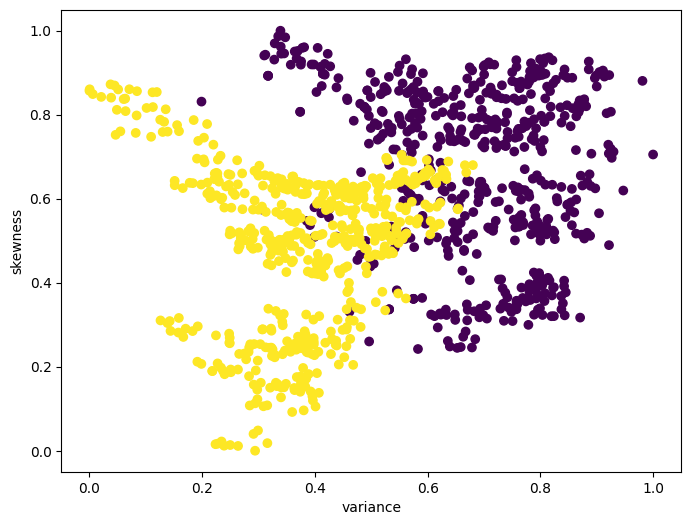

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(df_clean1.iloc[:,0], df_clean1.iloc[:,1], c = df_clean1['class'])
plt.xlabel('variance')
plt.ylabel('skewness')


In [ ]:
X = df_clean.iloc[:, :2]
y = df_clean.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)

**3. Modeling**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_final = KNeighborsClassifier()

cv = KFold(n_splits = 10, random_state = 99, shuffle= True)

grid_params_knn = {'n_neighbors' : range(1, 40), 'metric' : ['minkowski', 'euclidean', 'manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(X_train, y_train)
gs.best_params_



{'metric': 'minkowski', 'n_neighbors': 36}

In [ ]:
from sklearn import metrics

knn_final = KNeighborsClassifier(**gs.best_params_)
knn_final.fit(X_train, y_train)
knn_final.score(X_test, y_test)

0.944206008583691

In [ ]:
accuracy = []
count = []
for i in range (1,41):
  knn_manual = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
  knn_manual.fit(X_train, y_train)
  accuracy.append(knn_manual.score(X_test, y_test))
  count.append(i)

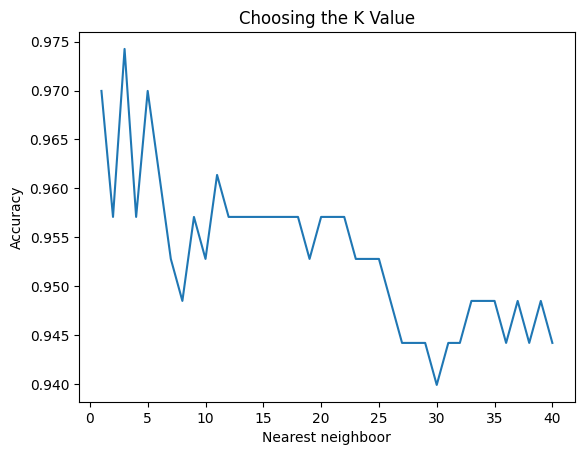

In [ ]:
plt.title('Choosing the K Value')
plt.plot(count,accuracy)
plt.xlabel('Nearest neighboor')
plt.ylabel('Accuracy')
plt.show()

**4. Deployment**

In [ ]:
New_data = pd.read_excel("/content/New_data.xlsx")
New_data

,variance,skewness,curtosis,entropy,class
0,-2.215300,11.9625,0.078538,-7.78530,authentic
1,2.126500,6.8783,0.447840,-2.22240,authentic
2,0.007125,8.3661,0.507810,-3.81550,authentic
3,2.289300,3.7330,0.631200,-0.39786,authentic
4,4.339800,-5.3036,3.880300,-0.70432,authentic
5,-5.441400,7.2363,0.109380,-7.56420,counterfeit
6,-4.124400,3.7909,-0.653200,-4.18020,counterfeit
7,-4.195800,-8.1819,12.129100,-1.60170,counterfeit
8,-0.878340,3.2570,-3.677800,-3.29440,counterfeit
9,-0.898090,-4.4862,2.200900,0.50731,counterfeit


In [ ]:
X_new = New_data.iloc[:,:2]
y_new = New_data.iloc[:,-1]

In [ ]:
y_pred = knn_final.predict(X_new)

In [ ]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 0:
    diag.append('authentic')
  if y_pred[i] == 1:
    diag.append('counterfeit')

diag = pd.DataFrame(diag, columns = ['Predicted Class'])

In [ ]:
diag

,Predicted Class
0,authentic
1,authentic
2,authentic
3,authentic
4,authentic
5,counterfeit
6,counterfeit
7,counterfeit
8,authentic
9,counterfeit


In [ ]:
compare = pd.merge(diag, New_data['class'], left_index=True, right_index=True)
compare

,Predicted Class,class
0,authentic,authentic
1,authentic,authentic
2,authentic,authentic
3,authentic,authentic
4,authentic,authentic
5,counterfeit,counterfeit
6,counterfeit,counterfeit
7,counterfeit,counterfeit
8,authentic,counterfeit
9,counterfeit,counterfeit
